In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("bank.csv")

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df[(df['default']==1)].count()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [8]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [9]:
def yes_no_encoding(cols):
    x = cols[0]
    if x=='yes':
        return 1
    else:
        return 0

In [10]:
df['loan'] = df[['loan']].apply(yes_no_encoding,axis=1)

In [11]:
df['housing'] = df[['housing']].apply(yes_no_encoding,axis=1)

In [12]:
df.default.unique()

array(['no', 'yes'], dtype=object)

In [13]:
df['default'] = df[['default']].apply(yes_no_encoding,axis=1)

In [14]:
df['y'] = df[['y']].apply(yes_no_encoding,axis=1)

In [15]:
df.dtypes

age           int64
job          object
marital      object
education    object
default       int64
balance       int64
housing       int64
loan          int64
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [16]:
df = pd.get_dummies(df,columns=['marital'],drop_first=True)

In [17]:
df.columns

Index(['age', 'job', 'education', 'default', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y', 'marital_married', 'marital_single'],
      dtype='object')

In [18]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

<AxesSubplot:xlabel='education', ylabel='count'>

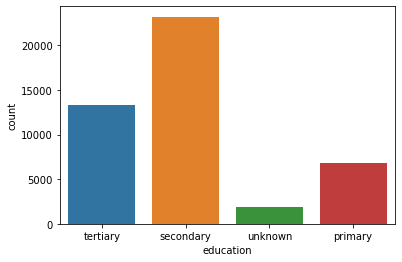

In [19]:
sns.countplot(x='education',data=df)

<AxesSubplot:xlabel='education', ylabel='age'>

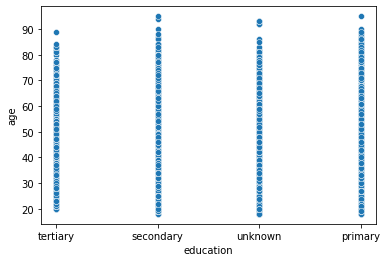

In [20]:
sns.scatterplot(x='education',y='age',data=df)

In [21]:
def education(cols):
    x = cols[0]
    if x == 'tertiary':
        return 3
    elif x == 'secondary':
        return 2
    elif x == 'primary':
        return 1
    else:
        return 0

In [22]:
df['education'] = df[['education']].apply(education,axis=1)

In [23]:
df.dtypes

age                 int64
job                object
education           int64
default             int64
balance             int64
housing             int64
loan                int64
contact            object
day                 int64
month              object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
y                   int64
marital_married     uint8
marital_single      uint8
dtype: object

In [24]:
df = pd.get_dummies(df,columns=['month'],drop_first=True)

In [25]:
def poutcome_encoding(cols):
    x = cols[0]
    if x == 'other':
        return 2
    elif x == 'failure':
        return 0
    elif x == 'success':
        return 1
    else:
        return 3

In [26]:
df['poutcome'] = df[['poutcome']].apply(poutcome_encoding,axis=1)

In [27]:
df.drop('contact',axis=1,inplace=True)

In [28]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [29]:
df = pd.get_dummies(df,columns=['job'])

In [30]:
df.drop('job_unknown',axis=1,inplace=True)

In [31]:
df.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'day',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y',
       'marital_married', 'marital_single', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed'],
      dtype='object')

In [32]:
corr = df.corr()

In [33]:
corr['y']

age                  0.025155
education            0.051341
default             -0.022419
balance              0.052838
housing             -0.139173
loan                -0.068185
day                 -0.028348
duration             0.394521
campaign            -0.073172
pdays                0.103621
previous             0.093236
poutcome            -0.128226
y                    1.000000
marital_married     -0.060260
marital_single       0.063526
month_aug           -0.008536
month_dec            0.075164
month_feb            0.038417
month_jan           -0.008783
month_jul           -0.034382
month_jun           -0.016805
month_mar            0.129456
month_may           -0.102500
month_nov           -0.014937
month_oct            0.128531
month_sep            0.123185
job_admin.           0.005637
job_blue-collar     -0.072083
job_entrepreneur    -0.019662
job_housemaid       -0.015195
job_management       0.032919
job_retired          0.079245
job_self-employed    0.000855
job_servic

In [34]:
df.drop('day',axis=1,inplace=True)

In [35]:
df.columns


Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y', 'marital_married',
       'marital_single', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed'],
      dtype='object')

In [36]:
df.drop(['job_admin.','job_self-employed','job_technician','poutcome'],axis=1,inplace=True)

In [37]:
df.drop(['month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep'],axis=1,inplace=True)

In [38]:
df.drop('education',axis=1,inplace=True)

In [39]:
df.nunique()

age                   77
default                2
balance             7168
housing                2
loan                   2
duration            1573
campaign              48
pdays                559
previous              41
y                      2
marital_married        2
marital_single         2
job_blue-collar        2
job_entrepreneur       2
job_housemaid          2
job_management         2
job_retired            2
job_services           2
job_student            2
job_unemployed         2
dtype: int64

In [40]:
df.campaign.unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

In [41]:
df.describe()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,marital_married,marital_single,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_services,job_student,job_unemployed
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.00000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,258.163080,2.763841,40.197828,0.580323,0.116985,0.601933,0.282896,0.215257,0.032890,0.027427,0.209197,0.050076,0.09188,0.020747,0.028820
std,10.618762,0.133049,3044.765829,0.496878,0.366820,257.527812,3.098021,100.128746,2.303441,0.321406,0.489505,0.450411,0.411005,0.178351,0.163326,0.406740,0.218105,0.28886,0.142538,0.167303
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


C:\Users\Chinmay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='age'>

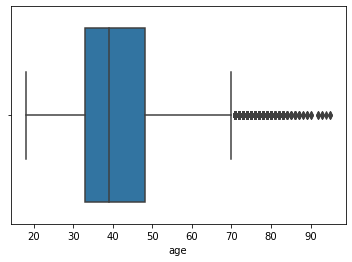

In [42]:
sns.boxplot(df['age'],orient="v")

C:\Users\Chinmay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital_single', ylabel='count'>

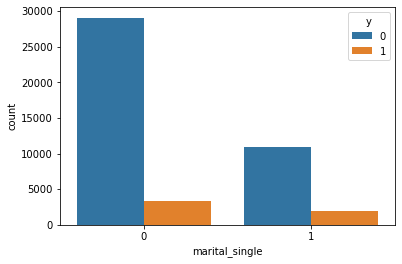

In [43]:
sns.countplot('marital_single',data=df,hue="y")

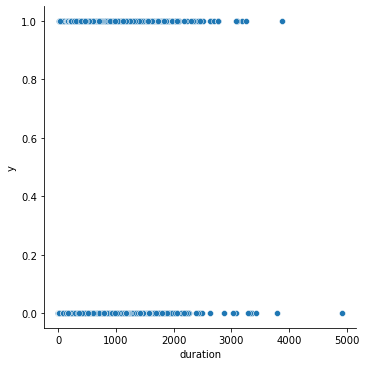

In [44]:
sns.relplot(x='duration',y='y',data=df)

In [45]:
df_test = df[(df['age']>70)]

In [46]:
test = df_test[['age','y']]['y']

In [47]:
test[(test==0)].count()

269

In [48]:
test[(test==1)].count()

218

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X = df.drop('y',axis=1)
y = df['y']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [53]:
scale = StandardScaler()

In [54]:
X_train_scaled = scale.fit_transform(X_train)

In [55]:
X_test_scaled = scale.transform(X_test)

In [56]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [57]:
log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

In [58]:
prediction = log_reg.predict(X_test_scaled)

In [59]:
from sklearn.metrics import confusion_matrix,classification_report

In [60]:
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[12951   235]
 [ 1366   368]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     13186
           1       0.61      0.21      0.31      1734

    accuracy                           0.89     14920
   macro avg       0.76      0.60      0.63     14920
weighted avg       0.87      0.89      0.87     14920



In [61]:
df[(df['y']==0)].y.count()

39922

In [62]:
df[(df['y']==1)].y.count()

5289

In [63]:
39922/(39922+5289)

0.8830151954170445

In [64]:
X_train_scaled.shape

(30291, 19)

In [65]:
y_train.shape

(30291,)

In [66]:
y_train[(y_train==0)].count()

26736

In [67]:
from imblearn.over_sampling import SMOTE

In [68]:
smt = SMOTE()

In [69]:
X_train_res, y_train_res = smt.fit_resample(X_train_scaled, y_train)

In [70]:
X_train_res.shape

(53472, 19)

In [71]:
log_reg.fit(X_train_res,y_train_res)

prediction = log_reg.predict(X_test_scaled)

print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[10706  2480]
 [  391  1343]]
              precision    recall  f1-score   support

           0       0.96      0.81      0.88     13186
           1       0.35      0.77      0.48      1734

    accuracy                           0.81     14920
   macro avg       0.66      0.79      0.68     14920
weighted avg       0.89      0.81      0.84     14920



In [72]:
from sklearn.model_selection import GridSearchCV

In [94]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [95]:
solvers = ['newton-cg', 'lbfgs', 'liblinear','sag']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)

grid_search = GridSearchCV(estimator=log_reg, param_grid=grid, cv=5, scoring='accuracy')
grid_result = grid_search.fit(X_train_res, y_train_res)

In [96]:
grid_result.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

In [84]:
log_classifier = LogisticRegression(C= 0.01, solver='liblinear')

In [85]:
log_classifier.fit(X_train_res,y_train_res)

LogisticRegression(C=0.01, solver='liblinear')

In [86]:
predict = log_classifier.predict(X_test_scaled)

In [87]:
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

[[10689  2497]
 [  388  1346]]
              precision    recall  f1-score   support

           0       0.96      0.81      0.88     13186
           1       0.35      0.78      0.48      1734

    accuracy                           0.81     14920
   macro avg       0.66      0.79      0.68     14920
weighted avg       0.89      0.81      0.83     14920

